In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops
from cnn_utils import *

D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = "0,1"

In [3]:

train_dataset = h5py.File('data.h5', 'r')
X_train_orig = np.array(train_dataset['X_train'][:])
Y_train_orig = np.array(train_dataset['y_train'][:]) 
X_test_orig = np.array(train_dataset['X_test'][:])
Y_test_orig = np.array(train_dataset['y_test'][:])
X_train = X_train_orig/255.
X_test = X_test_orig/255.


y = 5


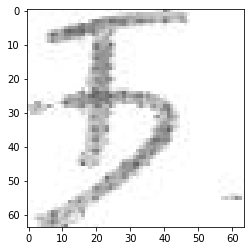

In [4]:
t = 1000
plt.imshow(X_train[t])
print("y = "+str(np.squeeze(Y_train_orig[t])+1))


In [5]:
Y_train_orig = Y_train_orig.T
Y_test_orig = Y_test_orig.T
Y_train = convert_to_one_hot(Y_train_orig, 10).T
Y_test = convert_to_one_hot(Y_test_orig, 10).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
print(Y_train[5])
conv_layers = {}

number of training examples = 2182
number of test examples = 200
X_train shape: (2182, 64, 64, 3)
Y_train shape: (2182, 10)
X_test shape: (200, 64, 64, 3)
Y_test shape: (200, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [6]:
#创建占位符
def creat_placeholder(n_H0, n_W0, n_C0, n_y):
    X = tf.placeholder(tf.float32,shape=[None,n_H0,n_W0,n_C0])
    Y = tf.placeholder(tf.float32,shape=[None,n_y])
    return X,Y



In [7]:
X, Y = creat_placeholder(64, 64, 3, 10)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


In [8]:
#初始化参数
def initialize_parameters():
    tf.set_random_seed(1)
    W1 = tf.get_variable("W1",   [4,4,3,8],initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2",  [2, 2, 8, 16], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W3 = tf.get_variable("W3",  [64,10], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    
    parameters = {
        "W1":W1,
        "W2":W2,
        "W3":W3
    }
    return parameters

In [9]:
#正向传播
def forward_propagation(X,parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    #CONV2D
    Z1 = tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding="SAME")
    #RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, sride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize=[1,8,8,1], strides=[1,8,8,1], padding="SAME")
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1, W2, strides=[1,1,1,1], padding="SAME")
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize=[1,4,4,1], strides=[1,4,4,1], padding="SAME")
    # FLATTEN
    P2 = tf.contrib.layers.flatten(P2)
    #FULLY-CONNECTED
    Z3 = tf.matmul(P2, W3)
    
    return Z3    

In [10]:
config = tf.ConfigProto()
config.allow_soft_placement=True
config.gpu_options.per_process_gpu_memory_fraction=0.7
config.gpu_options.allow_growth = True

In [11]:
with tf.Session(config=config) as sess:
    np.random.seed(1)
    X, Y = creat_placeholder(64, 64, 3, 10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,10)})
    print("Z3 = " + str(a))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Z3 = [[-3.6391187  -0.40035295  2.6781216  -1.157715   -0.7321388  -2.0522003
   2.0173054  -3.4039547  -1.0324228  -2.2833967 ]
 [-3.3136013  -0.23735619  2.5692577  -0.79102385 -0.24624065 -1.6117852
   1.7850628  -3.2946322  -1.1045172  -2.3272257 ]]


In [12]:
def compute_cost(Z3, Y):
    cost = tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y)
    cost = tf.reduce_mean(cost)    
    return cost



In [13]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = creat_placeholder(64, 64, 3, 10)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4,64,64,3), Y: np.random.randn(4,10)})
    print("cost = " + str(a))



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = 5.1455398


In [14]:
def model(X_train,Y_train,X_test,Y_test,learning_rate=0.005,num_epochs = 100,minibatch_size =64, print_cost = True):
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape
    n_y = Y_train.shape[1]                            
    costs = []
    
    X, Y = creat_placeholder(n_H0, n_W0, n_C0, n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
    
    with tf.Session(config=config) as sess:
        wirter = tf.summary.FileWriter('logs/',sess.graph)
        sess.run(init)
        for epoch in range(num_epochs):
            minibatch_cost = 0
            num_minibatches = int(m / minibatch_size)
            seed = seed +1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                minibatch_cost += temp_cost / num_minibatches
                
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
            if epoch == num_epochs-1:
                saver.save(sess,'params.ckpt')
            
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
            
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters
            

            
                
            
        
    
    


Cost after epoch 0: 2.375528
Cost after epoch 5: 0.425392
Cost after epoch 10: 0.319256
Cost after epoch 15: 0.248605
Cost after epoch 20: 0.203702
Cost after epoch 25: 0.181751
Cost after epoch 30: 0.149485
Cost after epoch 35: 0.119495
Cost after epoch 40: 0.110526
Cost after epoch 45: 0.098800
Cost after epoch 50: 0.100900
Cost after epoch 55: 0.065688
Cost after epoch 60: 0.056972
Cost after epoch 65: 0.058533
Cost after epoch 70: 0.053347
Cost after epoch 75: 0.041514
Cost after epoch 80: 0.031609
Cost after epoch 85: 0.036806
Cost after epoch 90: 0.090323
Cost after epoch 95: 0.020934
Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.9711274
Test Accuracy: 0.94


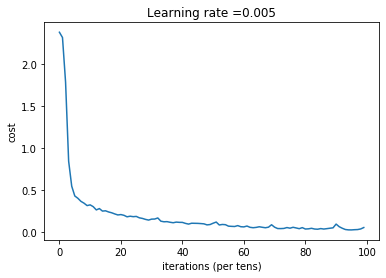

In [15]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)



1890
INFO:tensorflow:Restoring parameters from params.ckpt
(?, 64)
y = 7
[[-30.101244   -12.266581    -1.353605    -6.925416     1.2171454
   -0.91299117   8.100266   -36.90159      4.785799   -26.634783  ]]
predict y = 7


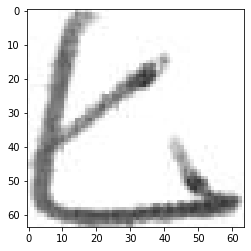

In [39]:
index = np.random.randint(0,2182) # choose from trainset randomly
print(index)
tf.reset_default_graph()

#predict
with tf.Session() as sess:
    np.random.seed(1)
    X, Y = creat_placeholder(64, 64, 3, 10)
    parameters = initialize_parameters()
    
    # initial parameters
    init = tf.global_variables_initializer()
    sess.run(init)
    
    # restore parameters
    variables = tf.global_variables()
    saver = tf.train.Saver()
    saver.restore(sess,'params.ckpt')
    
    # predict
    parametses = {variables[0],variables[1],variables[2]}
    predict_result = forward_propagation(X, parameters)
    
    #prepare data, use normalized data
    X_from_trainset = X_train[index].astype(np.float32)
    X_from_trainset = np.reshape(X_from_trainset,[1,64,64,3])
    Y_from_trainset = Y_train[index]
    Y_from_trainset = np.reshape(Y_from_trainset,[1,10])
    
    # display this picture
    plt.imshow(X_train_orig[index]/255)
    print ("y = " + str(np.squeeze(Y_train_orig[:,index])+1))
    #

    # display predict result
    a = sess.run(predict_result, {X: X_from_trainset, Y: Y_from_trainset})
    print(a)
    predict_class = np.argmax(a, 1)
    print("predict y = " + str(np.squeeze(predict_class)+1))

140
INFO:tensorflow:Restoring parameters from params.ckpt
(?, 64)
y = 2
[[ -6.2342033   6.275505   -1.0024683 -11.957131   -8.105859   -9.293765
   -4.7750382 -20.512867  -11.703423   -6.4592943]]
predict y = 2


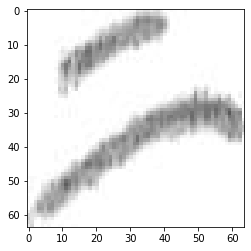

In [43]:
#np.random.seed(1)
tf.reset_default_graph()
index = np.random.randint(0,200) # choose from testset randomly
print(index)
#predict
with tf.Session() as sess:
    
    X, Y = creat_placeholder(64, 64, 3, 10)
    parameters = initialize_parameters()
    
    # initial parameters
    init = tf.global_variables_initializer()
    sess.run(init)
    
    # restore parameters
    variables = tf.global_variables()
    saver = tf.train.Saver()
    saver.restore(sess,'params.ckpt')
    
    #predict
    parametses = {variables[0],variables[1],variables[2]}
    predict_result = forward_propagation(X, parameters)
    
    #prepare data, use nomalized data
    X_from_testset = X_test[index].astype(np.float32)
    X_from_testset = np.reshape(X_from_testset,[1,64,64,3])
    Y_from_testset = Y_test[index]
    Y_from_testset = np.reshape(Y_from_testset,[1,10])
    #X,Y = create_placeholders(64, 64, 3, 10)
    
    
    # display this picture
    plt.imshow(X_test_orig[index]/255)
    print ("y = " + str(np.squeeze(Y_test_orig[:,index])+1))
    #

    #display predict result
    a = sess.run(predict_result, {X: X_from_testset, Y: Y_from_testset})
    print(a)
    predict_class = np.argmax(a, 1)
    print("predict y = " + str(np.squeeze(predict_class)+1))

INFO:tensorflow:Restoring parameters from params.ckpt
(?, 64)
[[-40.618866  -33.81633   -13.090858   -5.6422443   7.342139   -3.2911353
   14.36995   -70.023224   10.418106  -25.331024 ]]
predict y = [7]


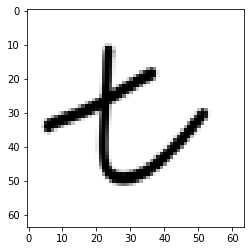

In [41]:
tf.reset_default_graph()

#这个图片名字叫做test.jpg
my_image = Image.open('7.jpg')
my_image = my_image.resize((64,64))
# display this picture
plt.imshow(my_image)

#prepare data
X_my_image = np.array(my_image)/255. # normalization
X_my_image = X_my_image.astype(np.float32)
X_my_image = np.reshape(X_my_image,[1,64,64,3])

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = creat_placeholder(64, 64, 3, 10)
    parameters = initialize_parameters()
    
    #initialize parameters
    init = tf.global_variables_initializer()
    sess.run(init)
    
    #restore parameters
    variables = tf.global_variables()
    saver = tf.train.Saver()
    saver.restore(sess,'params.ckpt')
    
    #predict
    parametses = {variables[0],variables[1],variables[2]}
    predict_result = forward_propagation(X, parameters)
    
    #display predict result
    a = sess.run(predict_result, {X: X_my_image, Y: [[1,0,0,0,0,0,0,0,0,0]]})
    print(a)
    predict_class = np.argmax(a, 1)
    print("predict y = " + str(predict_class+1))
